In [50]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib notebook
#from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import  StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.decomposition import PCA


In [11]:
data=pd.read_csv('Iris.csv')

In [12]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [14]:
data.shape

(150, 6)

In [15]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [16]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [17]:
data=data.drop('Id',axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<IPython.core.display.Javascript object>


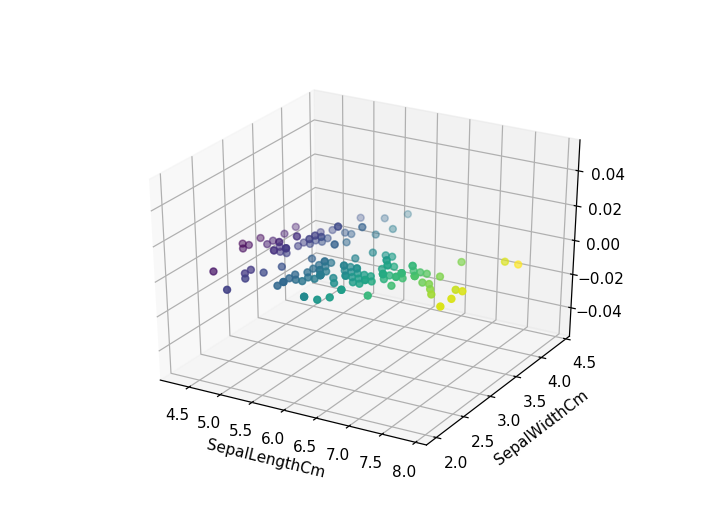

In [21]:
%matplotlib notebook
fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")
x=data['SepalLengthCm']
y=data['SepalWidthCm']
ax.scatter(x,y,c=data['SepalLengthCm'],marker='o')
ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('SepalWidthCm')
plt.show()




<IPython.core.display.Javascript object>


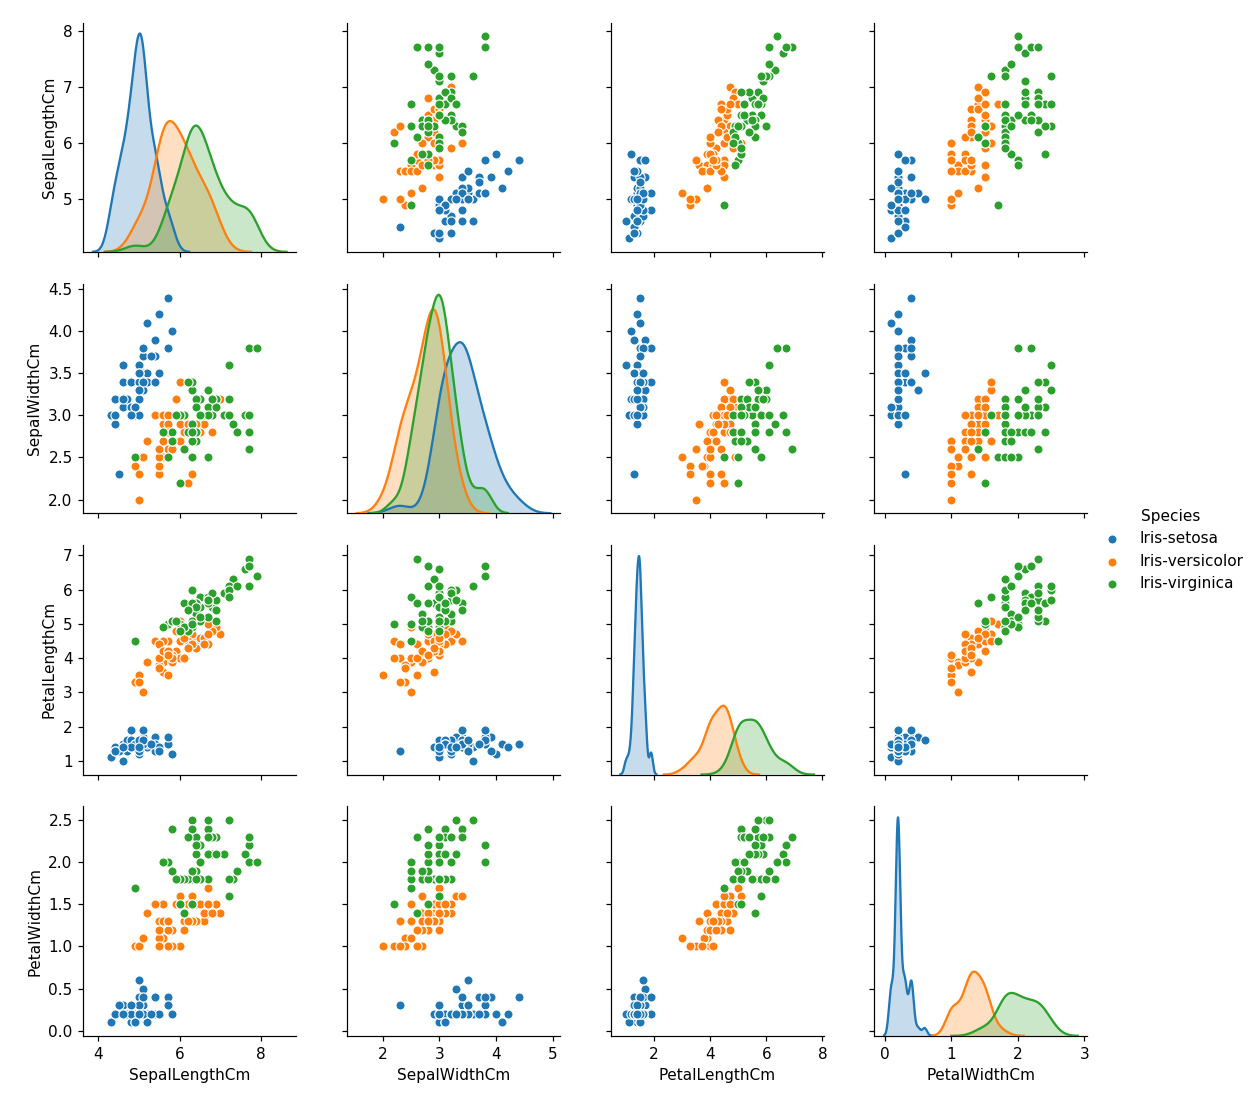

C:\Users\HEMNATH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [22]:
import seaborn as sns
sns.pairplot(data,hue='Species')

<IPython.core.display.Javascript object>


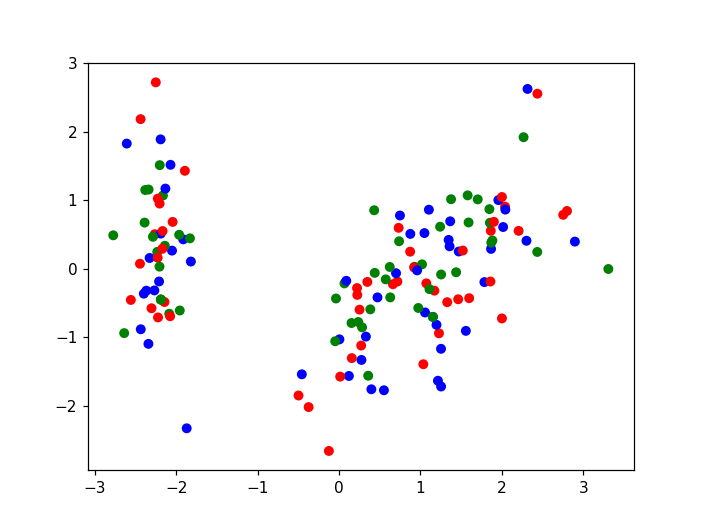

In [52]:
plt.figure()
colr=('r','g','b')
plt.scatter(finaldf['princomp1'],finaldf['princomp2'],s=30,c=colr)
plt.show()



In [24]:
## Standard Scaler
sc=StandardScaler()
features=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

#separating the features
x=data.loc[:,features]
y=data.loc[:,'Species']

In [25]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [26]:
# logistic regression
lr1=LogisticRegression()
model_lr=lr1.fit(xtrain,ytrain)
pred=lr1.predict(xtest)
accuracy_score(ytest,pred)*100

96.66666666666667

In [27]:
####decision Tree
model1=DecisionTreeClassifier(criterion = 'entropy',random_state=0)
model1.fit(xtrain,ytrain)
ypred=model1.predict(xtest)
accuracy_sc=metrics.accuracy_score(ytest,ypred)
accuracy_sc

1.0

In [28]:
##### Random forest
model_rf1=RandomForestClassifier(random_state=0)
model_rf1.fit(xtrain,ytrain)
prede=model_rf1.predict(xtest)
acc_sc=metrics.accuracy_score(ytest,prede)
acc_sc

0.9666666666666667

In [29]:
### PCA
pc1=PCA(n_components=2)
xtrain1=pc1.fit_transform(xtrain)
xtest1=pc1.transform(xtest)
expvariance=pc1.explained_variance_ratio_
expvariance

array([0.92597835, 0.0536899 ])

In [30]:
lr1.fit(xtrain1,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
pred2=lr1.predict(xtest1)
accuracy_score(ytest,pred2)

0.8333333333333334

In [33]:
# Standardising the scale
x=sc.fit_transform(x)

In [34]:
## PCA
pc=PCA(n_components=2)
pcomp=pc.fit_transform(x)

In [35]:
pc.get_covariance

<bound method _BasePCA.get_covariance of PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)>

In [36]:
pc.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [37]:
# lets plot this  first create the dataframe
principaldf=pd.DataFrame(pcomp,columns=['princomp1','princomp2'])
finaldf=pd.concat([principaldf,data[['Species']]],axis=1)
finaldf.head()

,princomp1,princomp2,Species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


In [38]:
### matplotlib

In [39]:
### fitting the model 
x1=finaldf.drop('Species',axis=1)
y1=finaldf.Species

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=0)


In [41]:
# logistic regression
lr=LogisticRegression()
model_lr=lr.fit(x_train,y_train)
pred=lr.predict(x_test)
accuracy_score(y_test,pred)*100

83.33333333333334

In [42]:
####decision Tree
model=DecisionTreeClassifier(criterion = 'entropy',random_state=0)
model.fit(x_train,y_train)
ypred=model.predict(x_test)
accuracy_sc=metrics.accuracy_score(y_test,ypred)
accuracy_sc

0.9666666666666667

In [43]:
##### Random forest
model_rf=RandomForestClassifier(random_state=0)
model_rf.fit(x_train,y_train)
prede=model_rf.predict(x_test)
acc_sc=metrics.accuracy_score(y_test,prede)
acc_sc

0.9

In [44]:
### PCA
pc=PCA(n_components=2)
xtrain1=pc.fit_transform(x_train)
xtest1=pc.transform(x_test)
expvariance=pc.explained_variance_ratio_

In [45]:
expvariance

array([0.75708662, 0.24291338])

In [46]:
lr.fit(xtrain1,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
pred1=lr.predict(xtest1)
accuracy_score(y_test,pred1)

0.8333333333333334

<IPython.core.display.Javascript object>


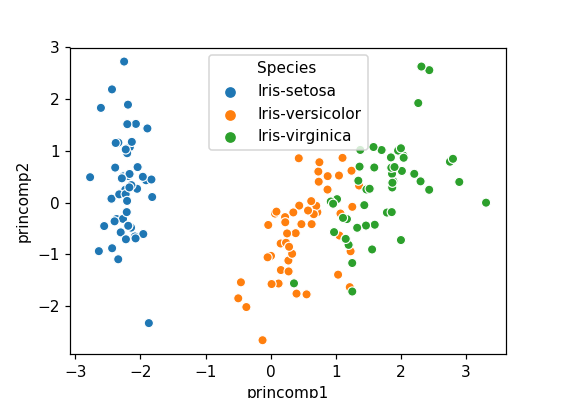

In [51]:
sns.scatterplot('princomp1','princomp2',hue='Species',data=finaldf)
plt.show()